<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Pabloacostatec-A01794035-/blob/main/Actividad_Semanal_7_Regresiones_y_K_means_A01794035.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
521,4.518689,38.634483
737,5.284690,33.233497
740,5.292696,34.550609
660,5.030596,34.982985
411,4.182289,43.090662
678,5.077623,29.087582
626,4.925292,39.152161
513,4.483809,41.780157
859,5.853092,36.344797
136,3.049856,54.462176


In [3]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [4]:
len(X)

1000

In [5]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

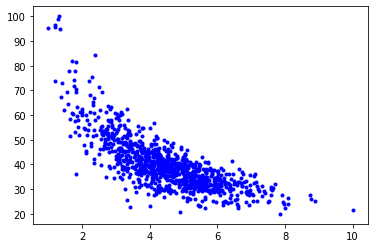

In [6]:
plt.plot(X,y,'b.')

Los coeficientes de la regresión lineal son:  [-6.12396253] 67.51699929483895
Los coeficientes de la regresión lineal son:  0.5836439303438314


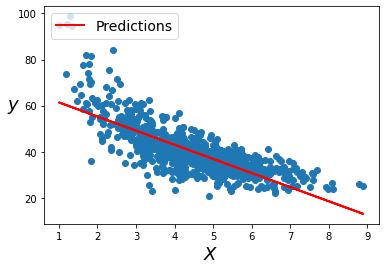

In [7]:
#lineal
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

from sklearn.metrics import r2_score

# construct best fit line
X_fit = X_train
y_fitLR = linear_reg.predict(X_fit)

plt.scatter(X_train,y_train)
plt.plot(X_fit, y_fitLR, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);
r2lR = r2_score(y_train,y_fitLR)

print('Los coeficientes de la regresión lineal son: ', linear_reg.coef_,linear_reg.intercept_)
print('Los coeficientes de la regresión lineal son: ', r2lR)
#print(y_fit)
#print(X_train)

Los coeficientes de la regresión lineal son:  [  0.         -17.35377809   1.24345115] 90.6928170951736
Los coeficientes de la regresión lineal son:  0.7294248584595203


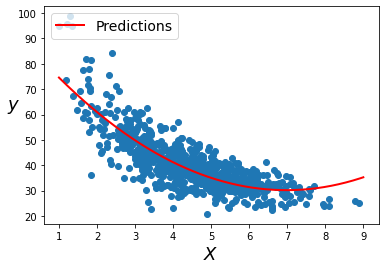

In [8]:
import warnings
warnings.filterwarnings("ignore")

#polinomial
from sklearn.preprocessing import PolynomialFeatures

CombinedXY = np.concatenate((X_train,y_train[:,None]),axis=1)

poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train)

lin2 = LinearRegression(fit_intercept = True)
lin2.fit(X_poly, y_train)

X_new= np.linspace(1, 9, 800).reshape(800, 1)
X_new_poly = poly.transform(X_new)
y_fitPL = lin2.predict(X_new_poly)

plt.scatter(X_train,y_train)
plt.plot(X_new, y_fitPL, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);
sorted_y_train = np.sort(CombinedXY, axis = 0)
reverse_array = sorted_y_train[::-1]
r2PL = r2_score(reverse_array[:,1],y_fitPL)

print('Los coeficientes de la regresión lineal son: ', lin2.coef_,lin2.intercept_)
print('Los coeficientes de la regresión lineal son: ', r2PL)
#print(y_fit)
#print(X_train)
#print(sorted_y_train)
#print(sorted_y_train)

Los coeficientes de la regresión lineal son:  [-6.12396253] 67.51699929483895
Los coeficientes de la regresión lineal son:  0.583628649234081


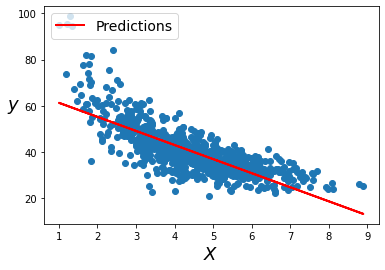

In [9]:
#Ridge

from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

Ridge_reg = Ridge(alpha = 10, solver = 'saga')
Ridge_reg.fit(X_train, y_train)

from sklearn.metrics import r2_score

# construct best fit line
X_fit = X_train
y_fitRidge = Ridge_reg.predict(X_fit)

plt.scatter(X_train,y_train)
plt.plot(X_fit, y_fitRidge, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);
r2Ridge = r2_score(y_train,y_fitRidge)

print('Los coeficientes de la regresión lineal son: ', linear_reg.coef_,linear_reg.intercept_)
print('Los coeficientes de la regresión lineal son: ', r2Ridge)
#print(y_fit)
#print(X_train)

Los coeficientes de la regresión lineal son:  [-6.12396253] 67.51699929483895
Los coeficientes de la regresión lineal son:  0.5836439252393616


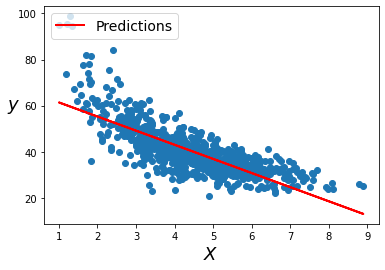

In [10]:
#Lasso

from sklearn import linear_model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

Ridge_reg = linear_model.Lasso(alpha = 0.001)
Ridge_reg.fit(X_train, y_train)

from sklearn.metrics import r2_score

# construct best fit line
X_fit = X_train
y_fitLasso = Ridge_reg.predict(X_fit)

plt.scatter(X_train,y_train)
plt.plot(X_fit, y_fitLasso, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);
r2Lasso = r2_score(y_train,y_fitLasso)

print('Los coeficientes de la regresión lineal son: ', linear_reg.coef_,linear_reg.intercept_)
print('Los coeficientes de la regresión lineal son: ', r2Lasso)
#print(y_fit)
#print(X_train)

In [11]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('R2 de Lineal es: ', r2lR)
print('R2 de Polinomial es: ', r2PL)
print('R2 de Rdige es: ', r2Ridge)
print('R2 de Lasso es: ', r2Lasso)

def mi_MAE(real_values,prediction_values):
  MAE = (np.abs(real_values-prediction_values)).mean()
  return MAE

print('-----------------------------------------------------')

print('MAE de Lineal es: ', mi_MAE(y_train,y_fitLR))
print('MAE de Polinomial es: ', mi_MAE(y_train,y_fitPL))
print('MAE de Ridge es: ', mi_MAE(y_train,y_fitRidge))
print('MAE de Lasso es: ', mi_MAE(y_train,y_fitLasso))

R2 de Lineal es:  0.5836439303438314
R2 de Polinomial es:  0.7294248584595203
R2 de Rdige es:  0.583628649234081
R2 de Lasso es:  0.5836439252393616
-----------------------------------------------------
MAE de Lineal es:  4.945478137356366
MAE de Polinomial es:  12.424010389065954
MAE de Ridge es:  4.942775148590844
MAE de Lasso es:  4.945427333087208


Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

**R = Dada l R2 y el MAE, el modelo POlinomial resultó ser el mejor modelo por un margen bastante considerable**

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9806,9407150310,20150128T000000,357000.0,4,2.50,1980,9757,2.0,0,0,...,7,1980,0,1995,0,98038,47.3675,-122.019,1610,6147
19856,7237501370,20140717T000000,1079000.0,4,3.25,4800,12727,2.0,0,0,...,10,4800,0,2011,0,98059,47.5311,-122.134,4750,13602
5870,3416601045,20140623T000000,345000.0,3,1.00,1140,4200,2.0,0,0,...,7,1140,0,1904,0,98144,47.6012,-122.296,1510,4000
3369,9407101380,20141230T000000,189000.0,3,2.00,1460,11481,1.0,0,0,...,7,1170,290,1995,0,98045,47.4493,-121.777,1540,9680
13685,3123059107,20140520T000000,555000.0,3,2.50,3050,158558,1.0,0,0,...,9,3050,0,1987,0,98055,47.4326,-122.208,2960,31050
11551,1938000140,20150428T000000,810000.0,4,2.00,2920,10424,1.0,0,0,...,8,1520,1400,1964,0,98005,47.5876,-122.172,2360,10696
283,7202360350,20140630T000000,780000.0,4,2.50,3500,7048,2.0,0,0,...,9,3500,0,2005,0,98053,47.6811,-122.025,3920,7864
3894,2085200261,20150218T000000,422500.0,3,2.00,1960,6450,1.0,0,0,...,7,1000,960,1977,0,98038,47.3972,-122.029,1660,20720
3931,3592500985,20150504T000000,880000.0,4,2.50,2350,4675,2.0,0,0,...,9,2150,200,1923,0,98112,47.6344,-122.305,2240,3848
19723,1085622860,20140721T000000,384435.0,3,2.50,2029,3906,2.0,0,0,...,9,2029,0,2014,0,98003,47.3410,-122.180,2029,3920


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [14]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [15]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


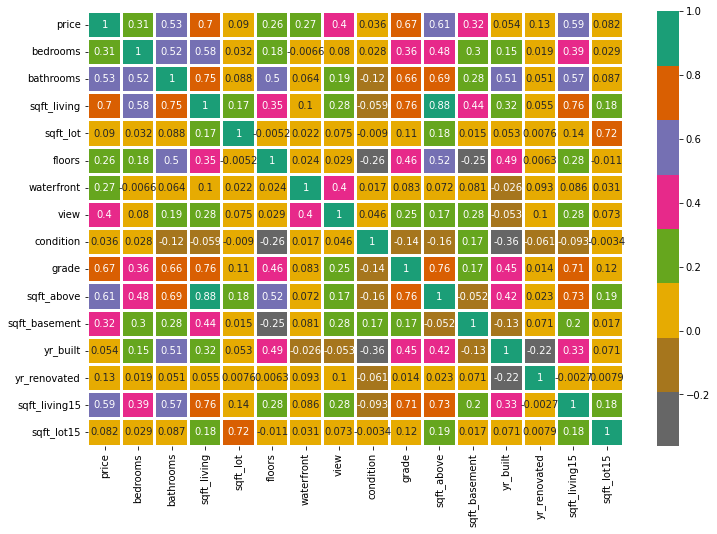

In [16]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [17]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 17290
Tamaño de X_train: (17290, 15)
**************************************************
Mumero total de registros en el test dataset: 4323
Tamaño del X_test: (4323, 15)


In [19]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

from sklearn.metrics import r2_score

# construct best fit line
X_fit = X_train
y_fitLR = linear_reg.predict(X_fit)

r2lR = r2_score(y_train,y_fitLR)

print('Los coeficientes de la regresión lineal son: ', linear_reg.coef_,linear_reg.intercept_)
print('la R2 de regresión lineal es: ', r2lR)
#print(y_fit)
#print(X_train)

Los coeficientes de la regresión lineal son:  [[-3.71022526e+04  4.01418845e+04  1.09169906e+02  2.64378621e-02
   2.95338523e+04  5.52048615e+05  4.22004055e+04  2.21281704e+04
   1.21117318e+05  5.02818538e+01  5.88880527e+01 -3.52812693e+03
   1.04703799e+01  2.60075557e+01 -5.66471373e-01]] [6093360.93532767]
la R2 de regresión lineal es:  0.6507293218091819


In [20]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree=3

polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X,y)
y_fitPL = polyreg.predict(X_train)

import matplotlib.pyplot as plt

X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1)

r2PL = r2_score(y_train,y_fitPL)

print('Los coeficientes de la regresión polinomial son: ', lin2.coef_,lin2.intercept_)
print('Los coeficientes de la regresión polinomial son: ', r2PL)
#print(y_fit)
#print(X_train)
#print(sorted_y_train)
#print(sorted_y_train)



Los coeficientes de la regresión polinomial son:  [  0.         -17.35377809   1.24345115] 90.6928170951736
Los coeficientes de la regresión polinomial son:  0.7772611392743695


In [21]:
#Ridge
from sklearn.linear_model import Ridge

Ridge_reg = Ridge(alpha = 10, solver = 'saga')
Ridge_reg.fit(X_train, y_train)

from sklearn.metrics import r2_score

# construct best fit line
X_fit = X_train
y_fitRidge = Ridge_reg.predict(X_fit)

r2Ridge = r2_score(y_train,y_fitRidge)

print('Los coeficientes de la regresión Ridge son: ', linear_reg.coef_,linear_reg.intercept_)
print('Los coeficientes de la regresión Ridge son: ', r2Ridge)
#print(y_fit)
#print(X_train)

Los coeficientes de la regresión Ridge son:  [[-3.71022526e+04  4.01418845e+04  1.09169906e+02  2.64378621e-02
   2.95338523e+04  5.52048615e+05  4.22004055e+04  2.21281704e+04
   1.21117318e+05  5.02818538e+01  5.88880527e+01 -3.52812693e+03
   1.04703799e+01  2.60075557e+01 -5.66471373e-01]] [6093360.93532767]
Los coeficientes de la regresión Ridge son:  0.4817254834829767


In [22]:
#Lasso

from sklearn import linear_model

Ridge_reg = linear_model.Lasso(alpha = 0.001)
Ridge_reg.fit(X_train, y_train)

from sklearn.metrics import r2_score

# construct best fit line
X_fit = X_train
y_fitLasso = Ridge_reg.predict(X_fit)

r2Lasso = r2_score(y_train,y_fitLasso)

print('Los coeficientes de la regresión Lasso son: ', linear_reg.coef_,linear_reg.intercept_)
print('Los coeficientes de la regresión Lasso son: ', r2Lasso)
#print(y_fit)
#print(X_train)

Los coeficientes de la regresión Lasso son:  [[-3.71022526e+04  4.01418845e+04  1.09169906e+02  2.64378621e-02
   2.95338523e+04  5.52048615e+05  4.22004055e+04  2.21281704e+04
   1.21117318e+05  5.02818538e+01  5.88880527e+01 -3.52812693e+03
   1.04703799e+01  2.60075557e+01 -5.66471373e-01]] [6093360.93532767]
Los coeficientes de la regresión Lasso son:  0.6507293218091807


In [23]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('R2 de Lineal es: ', r2lR)
print('R2 de Polinomial es: ', r2PL)
print('R2 de Ridge es: ', r2Ridge)
print('R2 de Lasso es: ', r2Lasso)

print('-----------------------------------------------------')

print('MAE de Lineal es: ', mi_MAE(y_train,y_fitLR))
print('MAE de Polinomial es: ', mi_MAE(y_train,y_fitPL))
print('MAE de Ridge es: ', mi_MAE(y_train,y_fitRidge))

R2 de Lineal es:  0.6507293218091819
R2 de Polinomial es:  0.7772611392743695
R2 de Ridge es:  0.4817254834829767
R2 de Lasso es:  0.6507293218091807
-----------------------------------------------------
MAE de Lineal es:  price    140333.580682
dtype: float64
MAE de Polinomial es:  price    119046.582547
dtype: float64
MAE de Ridge es:  price    168970.649079
dtype: float64


Explica tus resultados, que método se aproxima mejor, ¿por que?, ¿que porcentajes de entrenamiento y evaluación? ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

**R= El mejor modelo en el caso de regresión múltiple sigue siendo el modelo polinomial, ya que su desempeño es el mejor en toda sus métricas, en específico el modelo polinomial de grado 2 es el mejor de todos.**

**Conclusiones: la mejor métrica de desempeño es la R2 ya que está estandarizaada para ser interpretada en un rango de 0 a 1. En ambos ejercicios realizados, el mejor modelo fue el modelo poliomial de grado 2 ya que presentó mejor desempeño en ambas métricas**

#Ejercicio 3 K-means

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [24]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

In [26]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)


df.head()

,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [28]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

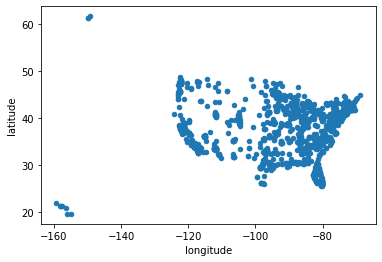

In [29]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [30]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [31]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [32]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [33]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [34]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [35]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

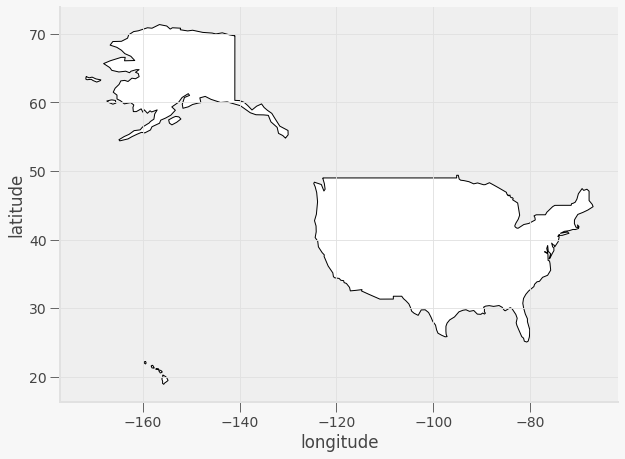

In [36]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

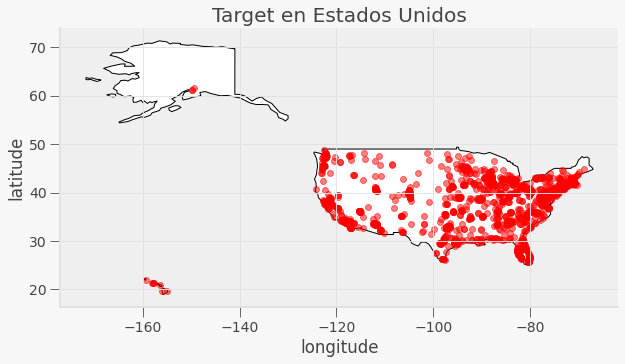

In [37]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

In [38]:
from sklearn.cluster import KMeans

Aqui se importa la librería necesaria

In [39]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, max_iter = 10000)
    kmeans.fit(latlong)
    wcss.append(kmeans.inertia_)

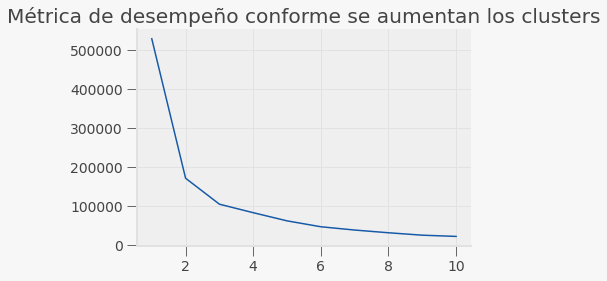

In [40]:
plt.plot(range(1,11),wcss)
plt.title('Métrica de desempeño conforme se aumentan los clusters')
plt.show()

Se hace un análisis de clústers óptimos, obteniendo la métrica de inertia conforme vamos iterando los clusters, obteniendo así como conclusión dado el gráfico de codo observado, que el número óptimo de clusters es 3

In [41]:
clustering = KMeans(n_clusters = 3, max_iter= 10000)
clustering.fit(latlong)

Optimal_Centers = pd.DataFrame(clustering.cluster_centers_)

print('Los clusters óptimos se encuentran en las siguientes coordenadas:\n ', clustering.cluster_centers_)

latlong['Cluster'] = clustering.labels_

print('-----------------------------------------------------------')

print('Esta es la lista de todas las coordenadas y su cluster perteneciente')
latlong

Los clusters óptimos se encuentran en las siguientes coordenadas:
  [[  37.48734203 -118.62447332]
 [  37.789554    -78.56990807]
 [  37.98006261  -93.3271723 ]]
-----------------------------------------------------------
Esta es la lista de todas las coordenadas y su cluster perteneciente


,latitude,longitude,Cluster
0,33.224225,-86.804174,2
1,33.334550,-86.989778,2
2,30.602875,-87.895932,2
3,34.560148,-86.971559,2
4,31.266061,-85.446422,1
...,...,...,...
1834,43.034293,-88.176840,2
1835,42.989604,-88.259806,2
1836,42.846799,-106.264166,0
1837,41.162019,-104.800048,2


Con el análisis de clusters óptimos encontramos que el número de clusters óptimos es 3 y por lo tanto volvemos a hacer un análisis de Kmeans para poder encontrar las coordenadas óptimos dados esos números de clusters, de igual manera se agrega a la matriz original el grupo en el cuál pertenecen los clusters

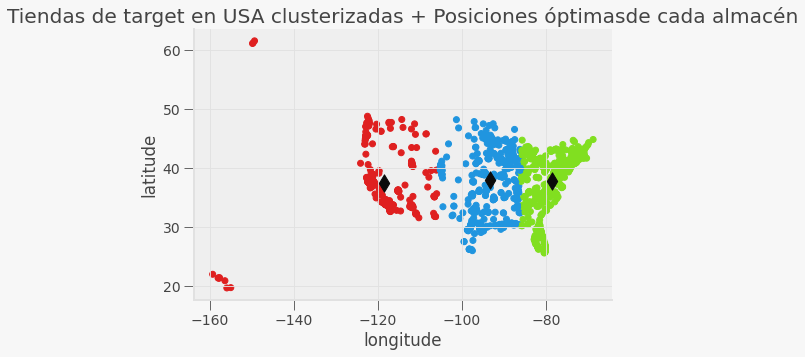

In [71]:

colors = ['#DF2020', '#81DF20', '#2095DF']
latlong['colormap'] = latlong.Cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

Lat = pd.DataFrame(latlong['latitude'])
Long = pd.DataFrame(latlong['longitude'])
Clus = pd.DataFrame(latlong['colormap'])

plt.scatter(latlong.longitude, latlong.latitude, c=  latlong.colormap)
plt.scatter(Optimal_Centers[1],Optimal_Centers[0], marker = 'd', s=150, color = '#0A0A0A')
plt.gcf().set_size_inches((7.5, 5))

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Tiendas de target en USA clusterizadas + Posiciones óptimasde cada almacén')

plt.show()

Preguntas:

**Encuentra las latitudes y longitudes de los almacenes, ¿que ciudad es?**

R = 

Cluster rojo: con coordenadas [37.48734203,-118.62447332] se encuentra en 'Paradise California'


Cluster Azul: [37.3789554, -78.56990807] se encuentra en 'Hurtsville, Virginia'


Cluster verde: [37.98006261,-93.3271723]  se encuentra en 'Hermitage, Misuri'


**¿A cuantas tiendas va surtir?, ¿sabes a que distancia estara?**

R = A todas, dependiendo del clúster en el que esté cada tienda

**¿Cómo elegiste el numero de almacenes?, justifica tu respuesta tecnicamente?**

R = Utilicé el gráfico de codo para ver el número óptimo de clusters que minimizaba la suma de distancia al cuadrado en relativamente menor número de clusters posibles, es decir visualmente es la punta del codo ( en este caso 3 clústers)

**¿qué librerías nos pueden ayudar a graficar este tipo de datos?**

En este caso se utilizaron geopandas y shapely.geometry, de igual se utilizó el paramétro "c" de pyplot para poder identificar los clústers

**¿Consideras importante que se grafique en un mapa?, ¿por qué?**

Sí lo considero importante, ya que la ubicación geográfica es un punto muy importante para poder tomar una decisión, estos mapas nos permiten entender la ubicación geográfica de manera rápida

**Conclusión: Con los clusters realizados podemos identificar a qué grupo pertenecen todas las tiendas, mappeamos los colores de cada grupo a un scatterplot Y de igual manera agregamos una etiqueta de los centros de clusters para visualizar ne que parte del país se va a agregar el cluster, estas etiquetas están marcadas con rombos negros**